<a href="https://colab.research.google.com/github/rishav-eulb/FSM/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


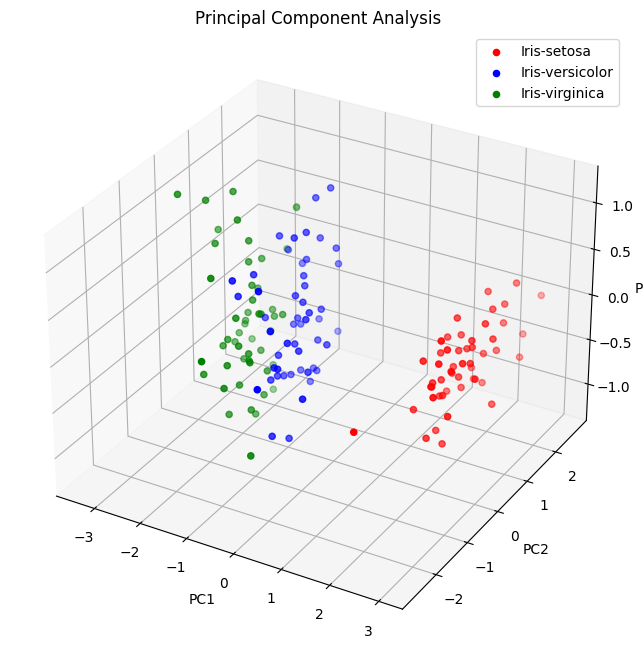

Eigenvalues:
PC1: 3.760335402824124
PC2: 0.9279491722113417
PC3: 0.2357025715021216


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def pca(dataset):
    # Remove the Species column and store it in a separate variable
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)
    
    # Convert the dataset to a numpy array
    data = dataset.values
    
    # Normalize the data
    data_normalized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(data_normalized.T)
    
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Take the first three eigenvectors
    eigenvectors = eigenvectors[:, :3]
    
    # Transform the data to the new coordinate system
    transformed_data = np.dot(data_normalized, eigenvectors)
    
    # Plotting the data in the first three eigenvectors
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red', 'blue', 'green']
    for i, species_name in enumerate(species.unique()):
        species_data = transformed_data[species == species_name]
        ax.scatter(species_data[:, 0], species_data[:, 1], species_data[:, 2], c=colors[i], label=species_name)
    ax.set_title('Principal Component Analysis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()
    plt.show()
    
    # Print the eigenvalues
    print('Eigenvalues:')
    for i, eigenvalue in enumerate(eigenvalues[:3]):
        print(f'PC{i+1}: {eigenvalue}')


# Load the Iris dataset
iris_dataset = pd.read_csv('iris_dataset.csv')

# Apply Principal Component Analysis
pca(iris_dataset)


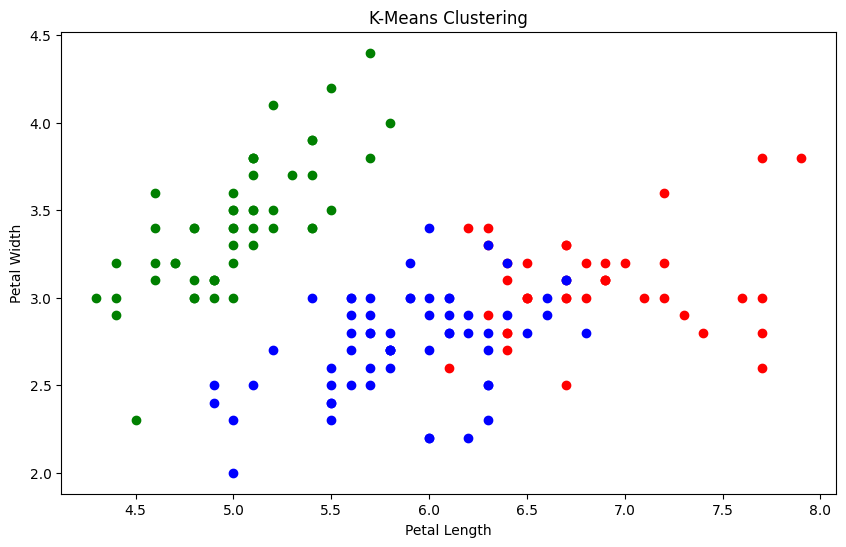

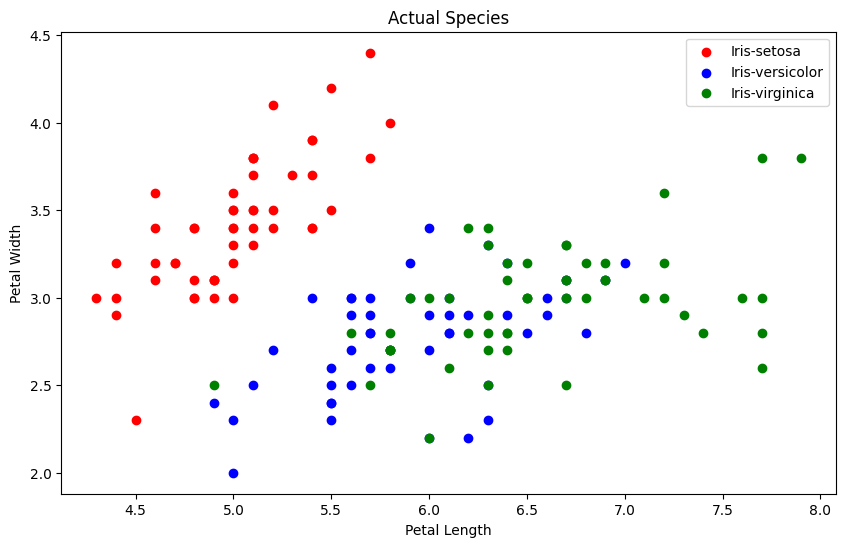

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def k_means_clustering(dataset, num_clusters):
    # Remove the Species column and store it in a separate variable
    species = dataset.iloc[:, -1]
    dataset = dataset.drop(dataset.columns[[0, -1]], axis=1)
    
    # Convert the dataset to a numpy array
    data = dataset.values
    
    # Initialize centroids randomly
    np.random.seed(0)
    random_indices = np.random.choice(data.shape[0], num_clusters, replace=False)
    centroids = data[random_indices]
    
    # Assign data points to clusters
    clusters = np.zeros(data.shape[0])
    distances = np.zeros((data.shape[0], num_clusters))
    for _ in range(100):  # maximum iterations
        for i in range(num_clusters):
            distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
        new_clusters = np.argmin(distances, axis=1)
        if np.array_equal(clusters, new_clusters):
            break
        clusters = new_clusters
        
        # Update centroids
        for i in range(num_clusters):
            centroids[i] = np.mean(data[clusters == i], axis=0)
    
    # Plotting the output of the clusters
    plt.figure(figsize=(10, 6))
    colors = ['red', 'blue', 'green']
    for i in range(num_clusters):
        cluster_data = data[clusters == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i])
    plt.title('K-Means Clustering')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()
    
    # Plotting the actual species
    plt.figure(figsize=(10, 6))
    for i, species_name in enumerate(species.unique()):
        species_data = data[species == species_name]
        plt.scatter(species_data[:, 0], species_data[:, 1], c=colors[i], label=species_name)
    plt.title('Actual Species')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()
    plt.show()


# Load the Iris dataset
iris_dataset = pd.read_csv('iris_dataset.csv')

# Apply K-Means Clustering
k_means_clustering(iris_dataset, num_clusters=3)
